In [1]:
import numpy as np
#np.random.seed = 0
from scipy.stats import pearsonr
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1132fce50>]], dtype=object)

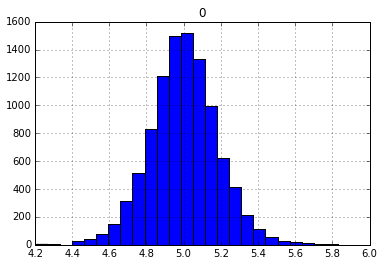

In [68]:
number_of_simulations = 10000
sample_size = 3000
sample_means = []
for _ in xrange(number_of_simulations):
    sample = np.random.uniform(0, 10, np.random.randint(100, 500))
    sample_means.append(sample.mean())
    
pd.DataFrame(sample_means).hist(bins=25)





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10af14950>]], dtype=object)

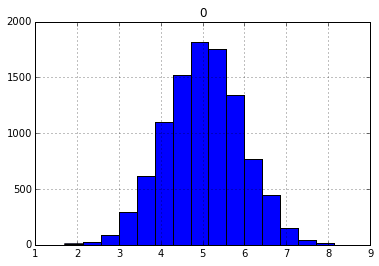

In [24]:
# draw from population
surrogate_population = np.random.poisson(lam=4, size=100)
print 'sample .75 ', np.percentile(surrogate_population, 75.)

sample .75  5.0


In [25]:
def bootstrap_sample(surrogate_population, n_bootstraps):
    samples = np.empty((0, len(surrogate_population)))
    for _ in xrange(n_bootstraps):
#        if _%200==0: print _
        indices = np.random.randint(low=0,
                                    high=len(surrogate_population),
                                   size=len(surrogate_population))
        sample = surrogate_population[indices]
        samples = np.vstack((samples, sample))
    return samples

bootstrap_samples = bootstrap_sample(surrogate_population, 1000)
bootstrap_medians = np.percentile(bootstrap_samples, 75., axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1123228d0>]], dtype=object)

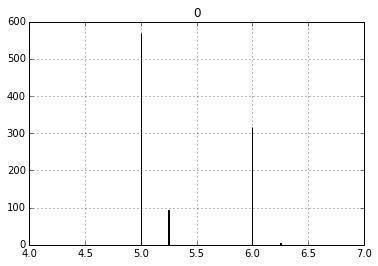

In [26]:
pd.DataFrame(bootstrap_medians).hist(bins=1000)